In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv(r'C:\Users\Kerry\adult-depression-lghc-indicator-24.csv')
print(data.shape)
data.head()

(161, 8)


,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                161 non-null    int64  
 1   Strata              161 non-null    object 
 2   Strata Name         161 non-null    object 
 3   Frequency           161 non-null    int64  
 4   Weighted Frequency  154 non-null    float64
 5   Percent             161 non-null    float64
 6   Lower 95% CL        161 non-null    float64
 7   Upper 95% CL        161 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 10.2+ KB


In [4]:
data.isnull().sum()

Year                  0
Strata                0
Strata Name           0
Frequency             0
Weighted Frequency    7
Percent               0
Lower 95% CL          0
Upper 95% CL          0
dtype: int64

In [5]:
data.fillna(300000)

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,300000.0,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
...,...,...,...,...,...,...,...,...
156,2018,Age,18 to 34,496,1623933.0,17.69,13.72,21.66
157,2018,Age,35 to 44,285,749615.0,14.56,10.91,18.21
158,2018,Age,45 to 54,301,1052945.0,20.06,15.60,24.52
159,2018,Age,55 to 64,432,854201.0,21.44,17.65,25.23


In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Year', 'Strata', 'Strata Name', 'Frequency', 'Weighted Frequency',
       'Percent', 'Lower 95% CL', 'Upper 95% CL'],
      dtype='object')

In [8]:
data.describe()

,Year,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
count,161.00000,161.000000,1.540000e+02,161.000000,161.000000,161.000000
mean,2015.00000,429.776398,8.898917e+05,14.789627,11.955280,17.624224
std,2.00624,390.297867,6.299145e+05,4.589876,3.705456,5.890040
min,2012.00000,28.000000,9.230900e+04,3.970000,2.000000,5.340000
25%,2013.00000,186.000000,4.597088e+05,11.850000,9.650000,13.870000
50%,2015.00000,314.000000,7.164805e+05,14.520000,11.550000,16.930000
75%,2017.00000,511.000000,1.109084e+06,17.190000,14.600000,20.050000
max,2018.00000,1964.000000,3.301418e+06,33.090000,24.600000,44.950000


### Data Visulalizations

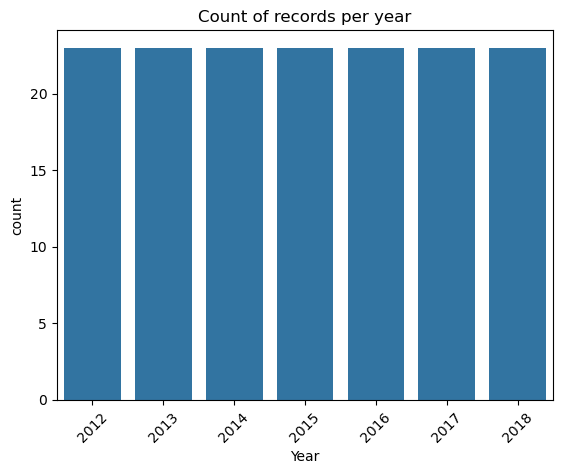

In [12]:
sns.countplot(data=data, x='Year')
plt.title('Count of records per year')
plt.xticks(rotation=45)
plt.show()

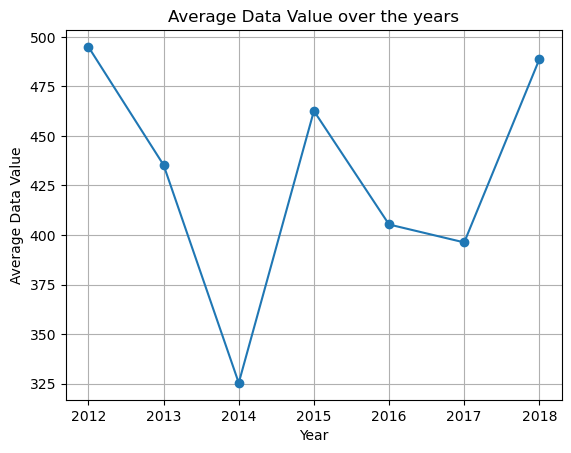

In [18]:
avg_by_year = data.groupby('Year')['Frequency'].mean()
avg_by_year.plot(kind='line', marker='o')
plt.title('Average Data Value over the years')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.grid(True)
plt.show()

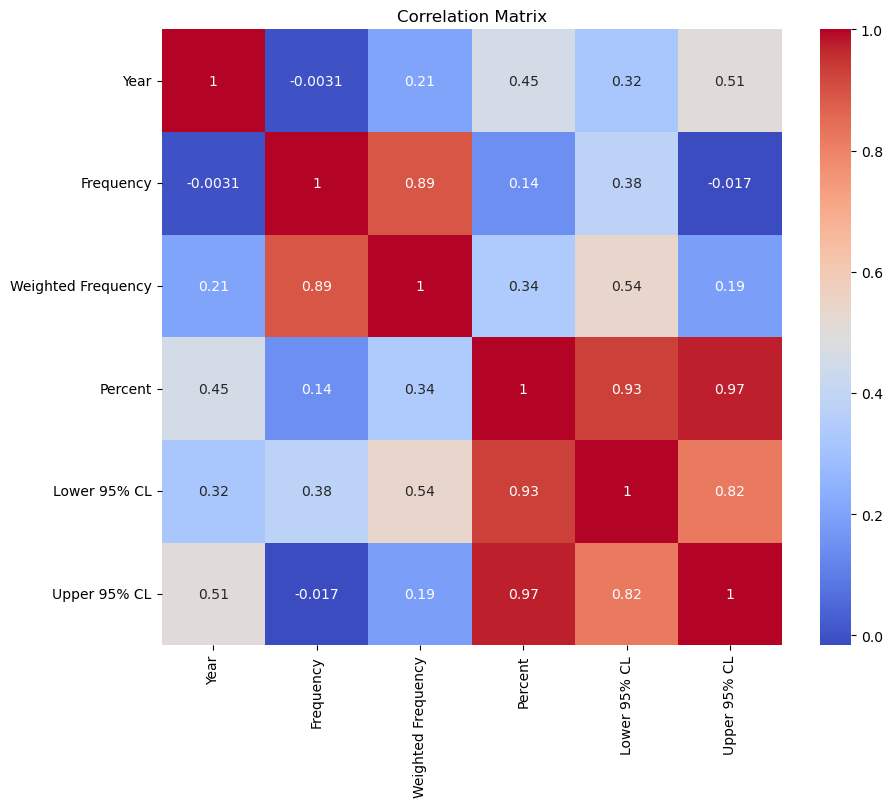

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

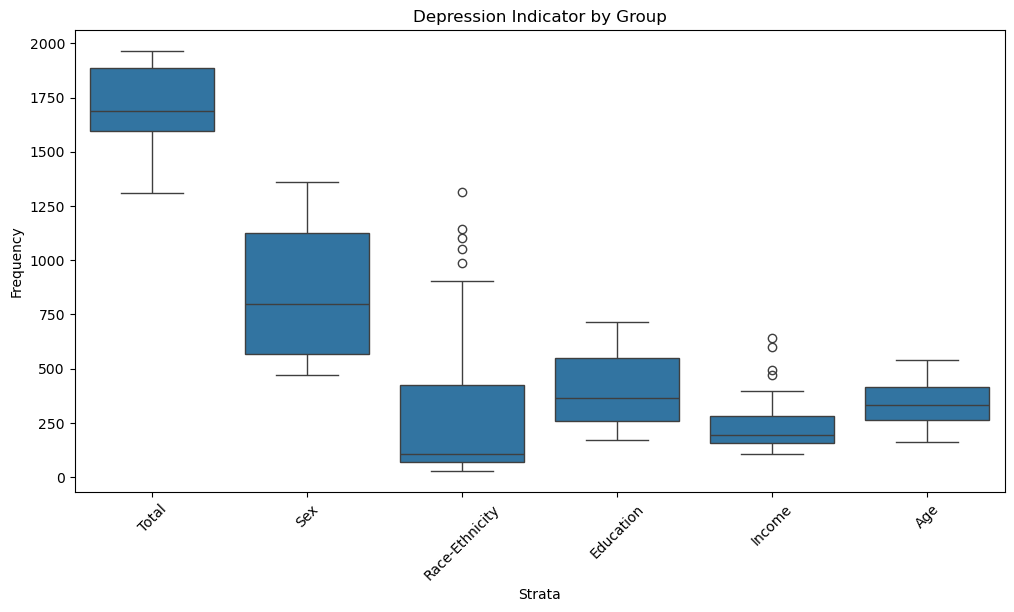

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Strata', y='Frequency')
plt.title('Depression Indicator by Group')
plt.xticks(rotation=45)
plt.show()
